In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


### IMDB 리뷰 데이터
케라스에서 제공하는 IMDB 리뷰 데이터는 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공한다.

num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지 갖고 올 것인지 조절한다.

20,000이란 값은 등장 빈도 순위가 1 ~ 20,000에 해당하는 단어만 갖고 오게 된다.

따라서 단어의 종류는 20,000개가 되므로 단어 집합의 크기는 20,000이 된다.

In [2]:
import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

np.load = np_load_old

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

print('x_train shape:', x_train.shape)
print('x_train shape:', x_test.shape)

x_train shape: (20000,)
x_train shape: (25000,)


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

### 모델 구성
**CNN (Convolutional Neural Networks, 합성곱 신경망)**

문장 해석에 컨볼루션(Conv1D) 레이어를 이용한 모델이다.

Conv1D : Extracts local features using 1D filters.

- 컨볼루션(Conv1D) 레이어는 위치에 상관없이 지역적인 특징을 잘 뽑아낸다.

이 레이어를 문장에 적용한다면 주요 단어가 문장 앞 혹은 문장 뒤에 있더라도 놓치지 않고 전후 문맥을 보면서 특징을 잘 뽑아낼 수 있다.

글로벌 맥스풀링(GlobalMaxPooling1D) 레이어는 컨볼루션 레이어가 문장을 훑어가면서 나온 특징벡터들 중 가장 큰 벡터를 골라준다.

즉, 문맥을 보면서 주요 특징을 뽑아내고, 그 중 가장 두드러지는 특징을 고르는 것이다.

In [5]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(Conv1D(256, # filters
                 3, # kernel_size
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0805 03:25:15.825292 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 03:25:15.869622 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 03:25:15.877741 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 256)         98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,585
Trainable params: 2,691,585
Non-trainable params: 0
_________________________________________________________________
None


### 모델 학습과정 설정

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0805 03:25:15.995131 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 03:25:16.025316 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 03:25:16.032444 140180487792512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 모델 학습시키기


In [8]:
hist = model.fit(x_train,
                 y_train,
                 epochs=25,
                 batch_size=64,
                 validation_data=(x_val, y_val))

W0805 03:25:16.316960 140180487792512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 74s 4ms/step - loss: 0.4255 - acc: 0.7838 - val_loss: 0.2723 - val_acc: 0.8864
Epoch 2/25
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1731 - acc: 0.9356 - val_loss: 0.2511 - val_acc: 0.8948
Epoch 3/25
20000/20000 [==============================] - 73s 4ms/step - loss: 0.0395 - acc: 0.9895 - val_loss: 0.3101 - val_acc: 0.8942
Epoch 4/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0056 - acc: 0.9996 - val_loss: 0.3426 - val_acc: 0.8986
Epoch 5/25
20000/20000 [==============================] - 72s 4ms/step - loss: 8.7586e-04 - acc: 1.0000 - val_loss: 0.3676 - val_acc: 0.8990
Epoch 6/25
20000/20000 [==============================] - 72s 4ms/step - loss: 3.9567e-04 - acc: 1.0000 - val_loss: 0.3866 - val_acc: 0.8992
Epoch 7/25
20000/20000 [==============================] - 72s 4ms/step - loss: 2.4725e-04 - acc: 1.0000 - val_loss: 0.400

### 테스트 데이터에 대해서 정확도 평가

In [9]:
scores = model.evaluate(x_train, y_train, verbose=0) 
print("정확도: %.2f%%" % (scores[1]*100))

정확도: 100.00%


### 학습과정

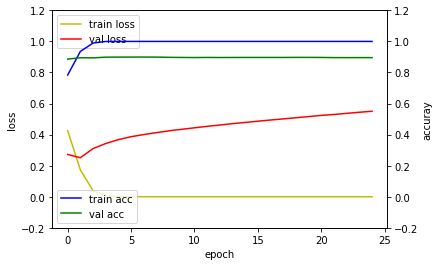

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가

In [11]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 21s 851us/step
## evaluation loss and_metrics ##
[0.5953750736355782, 0.884480000038147]
